# Data Preprocessing

After the exploration of the dataset, we will now preprocess the data. This includes:
- Removing unnecessary columns
- Handling outliers
- Encoding categorical variables
- Normalizing numerical variables

In this notebook, we will try building the preprocessing pipeline before extract to a separate module.

In [1]:
import pandas as pd

from ds_salaries_predict.config import RAW_DATA_DIR

data = pd.read_csv(RAW_DATA_DIR / "salaries.csv")

2025-05-24 20:10:08.379 | INFO     | ds_salaries_predict.config:<module>:11 - PROJ_ROOT path is: E:\Projects\ds-salaries-predict


In [2]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M
5,2025,SE,FT,Engineer,106000,USD,106000,US,0,US,M
6,2025,SE,FT,Manager,360200,USD,360200,US,0,US,M
7,2025,SE,FT,Manager,239700,USD,239700,US,0,US,M
8,2025,EN,FT,Data Scientist,49363,GBP,62484,GB,0,GB,M
9,2025,EN,FT,Data Scientist,41123,GBP,52054,GB,0,GB,M


Check the numberical data

In [3]:
print(data.describe())

          work_year        salary  salary_in_usd  remote_ratio
count  73148.000000  7.314800e+04   73148.000000  73148.000000
mean    2023.831192  1.625534e+05  158013.748619     21.582955
std        0.477551  1.925761e+05   72501.304728     41.023051
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2024.000000  1.069575e+05  106890.000000      0.000000
50%     2024.000000  1.480000e+05  147500.000000      0.000000
75%     2024.000000  2.000000e+05  199700.000000      0.000000
max     2025.000000  3.040000e+07  800000.000000    100.000000


Check the categorical data

In [4]:
print(data.describe(include=["object"]).T)

                    count unique             top   freq
experience_level    73148      4              SE  42926
employment_type     73148      4              FT  72808
job_title           73148    289  Data Scientist  11443
salary_currency     73148     25             USD  69418
employee_residence  73148     93              US  65982
company_location    73148     86              US  66035
company_size        73148      3               M  70536


First, we will encode the categorical variables.

In [5]:
preprocessed_data = data.copy()

There are some columns that can be encoded via ordinal encoding such as `experience_level` and `company_size`.

In [6]:
preprocessed_data["company_size"] = data["company_size"].map(
    {
        "S": 1,
        "M": 2,
        "L": 3,
    }
)
preprocessed_data["experience_level"] = data["experience_level"].map(
    {
        "EN": 1,
        "MI": 2,
        "SE": 3,
        "EX": 4,
    }
)

Some might need to be encode using one-hot encoding such as `employment_type`.

In [7]:
preprocessed_data = pd.get_dummies(
    preprocessed_data,
    columns=["employment_type"],
    prefix="employment_type",
    drop_first=True,
    dtype=int,
)

For the `salary_currency` column, we will drop it since it as it can refer from the company location. We will also drop the `salary` column since it is not needed for our analysis.

In [8]:
preprocessed_data = preprocessed_data.drop(columns=["salary_currency", "salary"], errors="ignore")

For the `job_title` we will explore many method such as `TfidfVectorize`.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
job_title = vectorizer.fit_transform(data["job_title"])
job_title_df = pd.DataFrame(job_title.toarray(), columns=vectorizer.get_feature_names_out())
# Prefix columns names with "job_title_"
# job_title_df.columns = [f"job_title_{col}" for col in job_title_df.columns]

In [26]:
job_title_df.add_prefix("job_title_", axis=1)

,job_title_account,job_title_actuarial,job_title_admin,job_title_administrator,job_title_ai,job_title_algorithm,job_title_analista,job_title_analyst,job_title_analytics,job_title_and,...,job_title_systems,job_title_team,job_title_tech,job_title_technical,job_title_technician,job_title_technology,job_title_vehicle,job_title_vision,job_title_visualization,job_title_writer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505056,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Concat the vectorized text data with the numerical data and categorical data.

In [10]:
preprocessed_data = pd.concat([preprocessed_data, job_title_df], axis=1)
preprocessed_data = preprocessed_data.drop(columns=["job_title"], errors="ignore")

Drop the null values

In [11]:
preprocessed_data = preprocessed_data.dropna()

Replace the country data such as `company_location` and `employee_residence` with the GDP data which could be related to the salary.

Remove some row that the GDP data is not available. After inpect each country has only 1 row.

In [12]:
preprocessed_data = preprocessed_data[
    ~preprocessed_data["company_location"].isin(["GI", "JE", "BM"])
]
preprocessed_data = preprocessed_data[
    ~preprocessed_data["employee_residence"].isin(["GI", "JE", "BM"])
]

Next we will use the `gdp` dataset from the IMF to get the GDP data. We will use the `country` column to merge the two datasets.

In [13]:
gdp = pd.read_csv(RAW_DATA_DIR / "imf-world-gdp.csv")
gdp.set_index("alpha_2", inplace=True)

In [ ]:
preprocessed_data.loc[:, "work_year"] = preprocessed_data["work_year"].astype(int)

preprocessed_data.loc[:, "company_location"] = preprocessed_data.apply(
    lambda x: gdp.loc[x["company_location"], str(x["work_year"])],
    axis=1,
)
preprocessed_data.loc[:, "employee_residence"] = preprocessed_data.apply(
    lambda x: gdp.loc[x["employee_residence"], str(x["work_year"])],
    axis=1,
)

In [15]:
preprocessed_data.head()

,work_year,experience_level,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employment_type_FL,employment_type_FT,employment_type_PT,...,job_title_systems,job_title_team,job_title_tech,job_title_technical,job_title_technician,job_title_technology,job_title_vehicle,job_title_vision,job_title_visualization,job_title_writer
0,2025,3,170000,30507.217,0,30507.217,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025,3,110000,30507.217,0,30507.217,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025,3,170000,30507.217,0,30507.217,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2025,3,110000,30507.217,0,30507.217,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2025,3,143000,30507.217,0,30507.217,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Check if the target has the normal outliers

[]

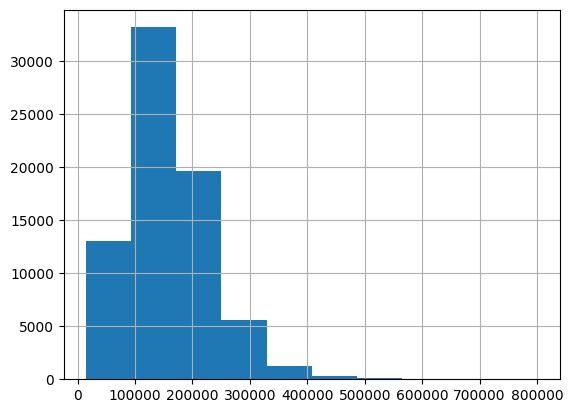

In [17]:
preprocessed_data["salary_in_usd"].hist(bins=10).plot()

Winsorize the target variable to clip the outliers. We will use the `scipy.stats.mstats.winsorize` function to do this.

[]

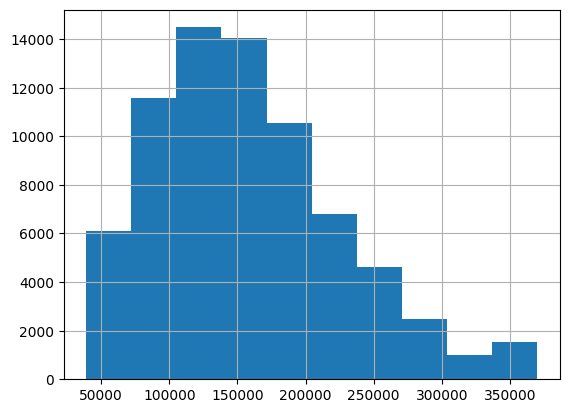

In [20]:
from scipy.stats import mstats

pd.Series(mstats.winsorize(preprocessed_data["salary_in_usd"], limits=[0.01, 0.01])).hist(
    bins=10
).plot()

In [22]:
preprocessed_data["salary_in_usd"] = mstats.winsorize(preprocessed_data["salary_in_usd"], limits=[0.01, 0.01])

Save the final dataset to a csv file.

In [16]:
from ds_salaries_predict.config import PROCESSED_DATA_DIR

preprocessed_data.to_csv(PROCESSED_DATA_DIR / "salaries_preprocessed.csv", index=False)